In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
server = 'rowyna\MSSQLSERVER01'
database = 'machine'
driver = 'ODBC Driver 17 for SQL Server'
username = 'romooo044@gmail.com'
password = 'Rowynaazzam_1127'

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\SEVEN\AppData\Local\Temp\ipykernel_32272\3991266473.py:1: SyntaxWarning: invalid escape sequence '\M'
  server = 'rowyna\MSSQLSERVER01'


In [3]:
connection_string = f"mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

In [4]:
engine = create_engine(connection_string)

In [5]:
with engine.connect() as connection:
    result = connection.execute(text("SELECT TOP 100 *FROM Final_Joined_Clean"))
    for row in result:
        print(row)

('BI-2536', 'KMRC-20', 6.3e-05, 1, 564.0, 4.43, 529.0, 25.0, 0.0, 10.0, 93.79, 1.77, None, None, None, None)
('BI-2536', 'KMRC-20', 6.3e-05, 1, 460.0, 3.91, 437.0, 18.0, 0.0, 5.0, 95.0, 1.09, None, None, None, None)
('BI-2536', 'KMRC-20', 0.00019, 1, 606.0, 2.97, 584.0, 17.0, 1.0, 4.0, 96.37, 0.66, None, None, None, None)
('BI-2536', 'KMRC-20', 0.00019, 1, 497.0, 6.04, 459.0, 28.0, 2.0, 8.0, 92.35, 1.61, None, None, None, None)
('BI-2536', 'KMRC-20', 0.00056, 1, 490.0, 2.86, 466.0, 14.0, 0.0, 10.0, 95.1, 2.04, None, None, None, None)
('BI-2536', 'KMRC-20', 0.00056, 1, 644.0, 4.81, 607.0, 31.0, 0.0, 6.0, 94.26, 0.93, None, None, None, None)
('BI-2536', 'KMRC-20', 0.0017, 1, 572.0, 5.59, 534.0, 32.0, 0.0, 6.0, 93.36, 1.05, None, None, None, None)
('BI-2536', 'KMRC-20', 0.0017, 1, 611.0, 3.6, 583.0, 22.0, 0.0, 6.0, 95.42, 0.98, None, None, None, None)
('BI-2536', 'KMRC-20', 0.0051, 1, 693.0, 4.62, 653.0, 31.0, 1.0, 8.0, 94.23, 1.15, None, None, None, None)
('BI-2536', 'KMRC-20', 0.0051, 1

In [7]:
query = "SELECT * FROM Final_Joined_Clean"
df = pd.read_sql(query, engine)
df.fillna(0, inplace=True)

In [8]:
df['Compound Name ID'] = pd.factorize(df['Small Molecule Name'])[0]
df['Cell Name ID'] = pd.factorize(df['Cell Line Name'])[0]
df.fillna(0, inplace=True)

In [9]:
features = [
    'Compound Name ID', 'Cell Name ID',
    'Assay compound conc (uM)', 'Day', 'Cell count',
    'Interphase count', 'Apoptotic count', 'Dead count', 'Mitotic count',
    '% Interphase', '% Mitotic'
]


🎯 rate of resgression: 
Mean Squared Error (MSE): 5.11
R² Score: 0.98


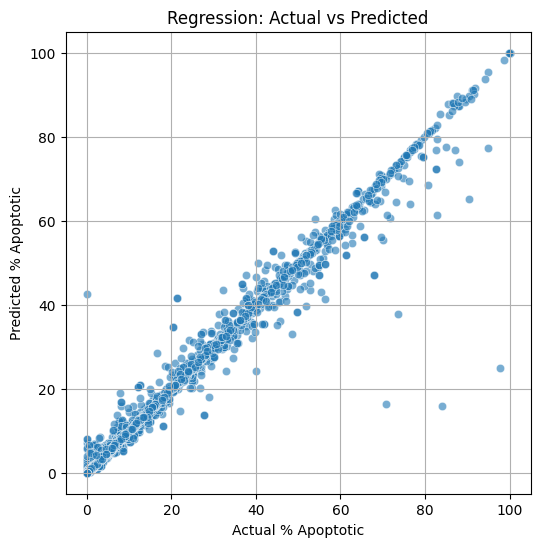

In [10]:
X = df[features]
y_reg = df['% Apoptotic']  
y_clf = df['% Apoptotic'].apply(lambda x: 1 if x > 50 else 0)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_scaled, y_train_reg)
y_pred_reg = reg_model.predict(X_test_scaled)

print("\n🎯 rate of resgression: ")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R² Score: {r2_score(y_test_reg, y_pred_reg):.2f}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6)
plt.xlabel("Actual % Apoptotic")
plt.ylabel("Predicted % Apoptotic")
plt.title("Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(6, 6))


plt.plot(y_test_reg, y_test_reg, color='red', linestyle='--', label='Ideal Prediction')

sns.scatterplot(x=y_test_reg, y=y_pred_reg, color='blue', label='Predicted vs Actual', alpha=0.6)

plt.xlabel("Actual % Apoptotic")
plt.ylabel("Predicted % Apoptotic")
plt.title("Regression: Actual vs Predicted")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_scaled, y_train_clf)
y_pred_clf = clf_model.predict(X_test_scaled)

print("\n🧠 Classification Results:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Report:\n", classification_report(y_test_clf, y_pred_clf))


🧠 Classification Results:
Accuracy: 0.9946958395491463
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5722
           1       0.98      0.92      0.95       311

    accuracy                           0.99      6033
   macro avg       0.99      0.96      0.97      6033
weighted avg       0.99      0.99      0.99      6033



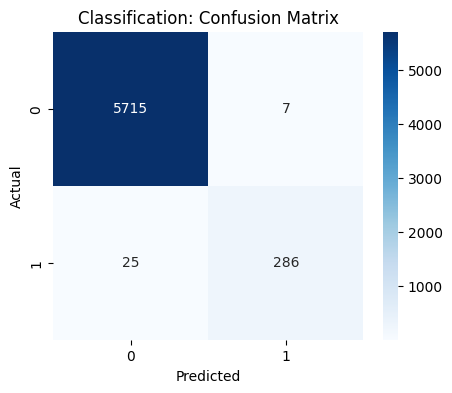

In [12]:
cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Classification: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\SEVEN\AppData\Local\Temp\ipykernel_32272\1183154935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
C:\Users\SEVEN\AppData\Local\Temp\ipykernel_32272\1183154935.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
f:\python\depi\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


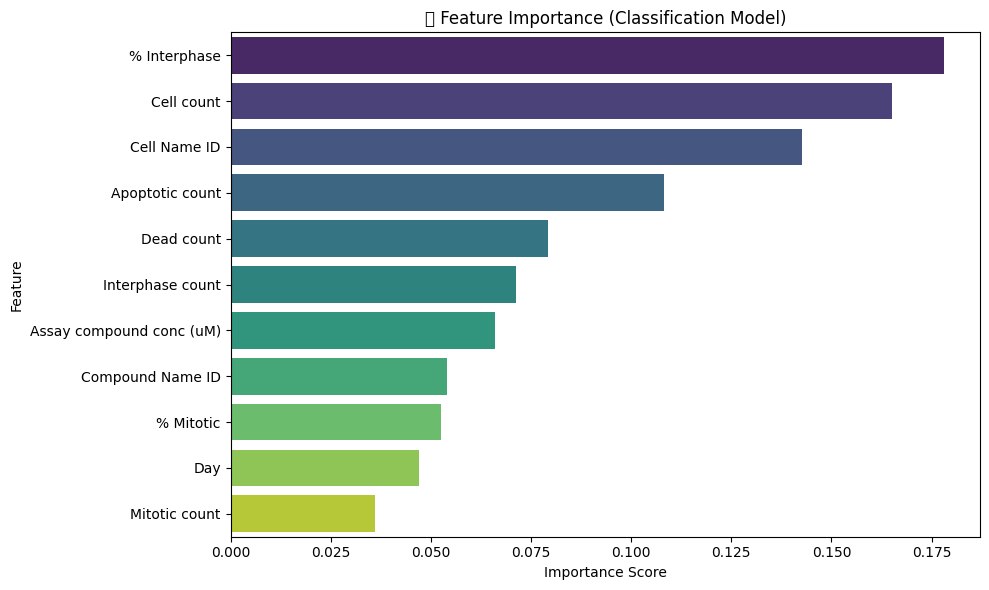

In [13]:
importances = clf_model.feature_importances_
feature_names = features

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("🔍 Feature Importance (Classification Model)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()